In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load updated combined dataset
combined = pd.read_csv("../../Datasets/combined_updated.csv")

In [3]:
# view top 5 
combined.head()

,Unnamed: 0,LOCATION,DATETIME,TEMPERATURE,TOTALDEMAND,REGIONID,YEAR,MONTH,SEASON
0,0,Bankstown,2010-01-01 00:00:00,23.1,8038.00,NSW1,2010,Jan,Summer
1,1,Bankstown,2010-01-01 00:30:00,22.9,7809.31,NSW1,2010,Jan,Summer
2,2,Bankstown,2010-01-01 01:00:00,22.6,7483.69,NSW1,2010,Jan,Summer
3,3,Bankstown,2010-01-01 01:30:00,22.5,7117.23,NSW1,2010,Jan,Summer
4,4,Bankstown,2010-01-01 02:00:00,22.5,6812.03,NSW1,2010,Jan,Summer


In [4]:
# view bottom 5 
combined.tail()

,Unnamed: 0,LOCATION,DATETIME,TEMPERATURE,TOTALDEMAND,REGIONID,YEAR,MONTH,SEASON
866948,866948,Adelaide (Kent Town),2021-03-17 23:30:00,19.6,4660.85,VIC1,2021,Mar,Autumn
866949,866949,Adelaide (Kent Town),2021-03-18 00:00:00,19.5,5737.03,QLD1,2021,Mar,Autumn
866950,866950,Adelaide (Kent Town),2021-03-18 00:00:00,19.5,1340.58,SA1,2021,Mar,Autumn
866951,866951,Adelaide (Kent Town),2021-03-18 00:00:00,19.5,4608.85,VIC1,2021,Mar,Autumn
866952,866952,Melbourne (Olympic Park),2016-11-14 15:30:00,14.3,8123.87,NSW1,2016,Nov,Spring


In [5]:
# Drop first column
combined.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Get basic stats
combined.describe()

,TEMPERATURE,TOTALDEMAND,YEAR
count,866953.000000,866953.000000,866953.000000
mean,19.762387,5426.701446,2015.164381
std,5.803483,2599.909242,3.212896
min,-1.300000,21.890000,2010.000000
25%,15.800000,4112.570000,2012.000000
50%,20.200000,5865.180000,2015.000000
75%,23.800000,7229.220000,2018.000000
max,44.700000,14579.860000,2021.000000


In [7]:
# Group by Region avergage temperature and demand
combined.groupby(['REGIONID'])[['TEMPERATURE','TOTALDEMAND']] .mean()

,TEMPERATURE,TOTALDEMAND
REGIONID,,
NSW1,18.387445,7957.513156
QLD1,20.417530,6026.383778
SA1,20.417513,1383.848368
VIC1,20.417530,5252.184045


In [8]:
# Group by Region maximum temperature and demand
combined.groupby(['REGIONID'])[['TEMPERATURE','TOTALDEMAND']] .max()

,TEMPERATURE,TOTALDEMAND
REGIONID,,
NSW1,44.7,14579.86
QLD1,42.4,9988.09
SA1,42.4,3385.42
VIC1,42.4,10240.22


In [9]:
# Group by Region minimum temperature and demand
combined.groupby(['REGIONID'])[['TEMPERATURE','TOTALDEMAND']] .min()

,TEMPERATURE,TOTALDEMAND
REGIONID,,
NSW1,-1.3,5074.63
QLD1,1.3,3748.24
SA1,1.3,21.89
VIC1,1.3,2307.07


<AxesSubplot:>

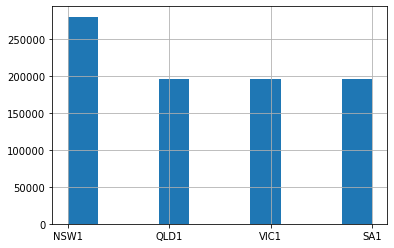

In [10]:
# Plot histogram of counts per region
combined['REGIONID'].hist()

array([[<AxesSubplot:title={'center':'TEMPERATURE'}>,
        <AxesSubplot:title={'center':'TOTALDEMAND'}>]], dtype=object)

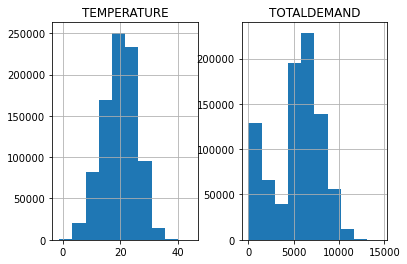

In [11]:
# Plot hiostogram of temperature and total demand
combined[['TEMPERATURE', 'TOTALDEMAND']].hist()

REGIONID
NSW1    AxesSubplot(0.125,0.125;0.775x0.755)
QLD1    AxesSubplot(0.125,0.125;0.775x0.755)
SA1     AxesSubplot(0.125,0.125;0.775x0.755)
VIC1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

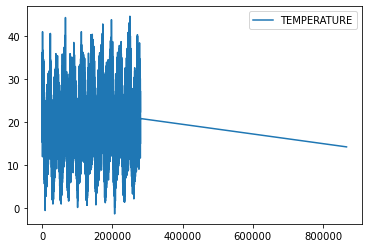

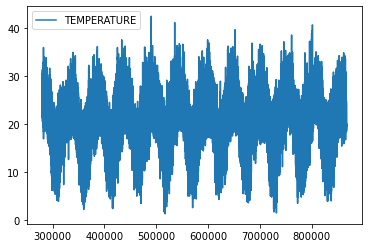

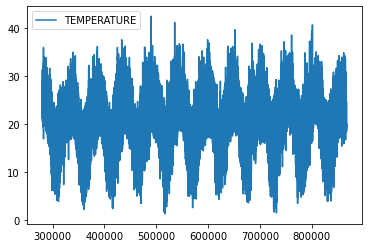

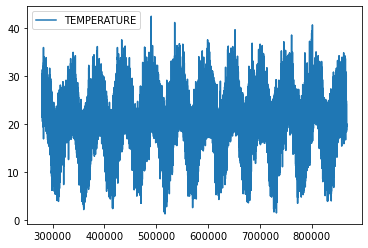

In [12]:
# Plot histogram of temperature per region
combined.groupby(['REGIONID'])[['TEMPERATURE']] .plot(legend=True)

REGIONID
NSW1    AxesSubplot(0.125,0.125;0.775x0.755)
QLD1    AxesSubplot(0.125,0.125;0.775x0.755)
SA1     AxesSubplot(0.125,0.125;0.775x0.755)
VIC1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

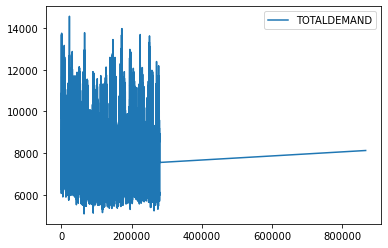

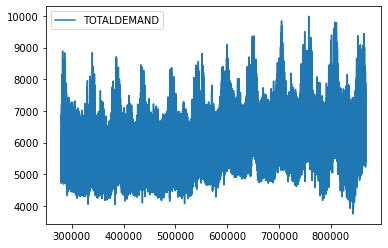

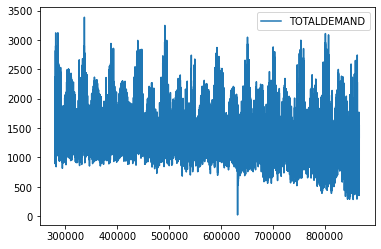

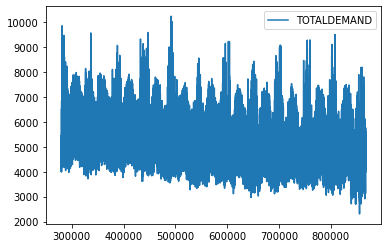

In [13]:
# Plot histogram of temperature per region
combined.groupby(['REGIONID'])[['TOTALDEMAND']] .plot(legend=True)

<AxesSubplot:xlabel='TOTALDEMAND', ylabel='TEMPERATURE'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


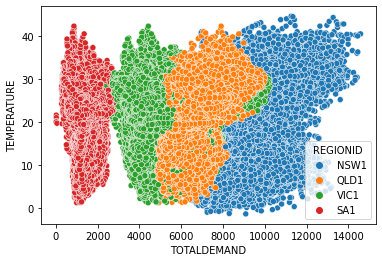

In [14]:
# Demand vs Temperature 
sns.scatterplot(x='TOTALDEMAND', y='TEMPERATURE', data=combined, hue='REGIONID')

<AxesSubplot:xlabel='DATETIME', ylabel='TEMPERATURE'>

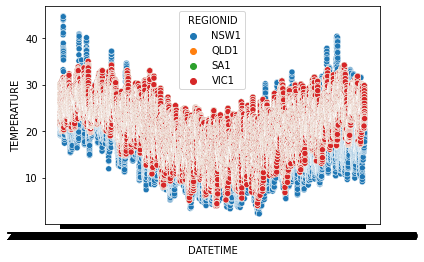

In [19]:
# Date vs temperature for 2020
sns.scatterplot(x='DATETIME', y = 'TEMPERATURE', data=combined[combined['YEAR'] == 2020], hue='REGIONID')
#sns.scatterplot(x='TOTALDEMAND', y='TEMPERATURE', data=combined[combined['YEAR'] == 2020], hue='REGIONID')